In [38]:
import data_manager

# Part 1. Data cleaning and Exploratory Data Analysis (EDA)

This part will practice data cleaning and Exploratory Data Analysis (EDA) using a house price dataset and mpg dataset.<br>
The first dataset is from a [Kaggle competition ](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview), where the task is to predict a house sale price given house features.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## 1. Import data and visually inspect the table
### 1a) Data import and basic inspection.
We can import the csv data using `pd.read_csv()` function. We can use `df.head()` and `df.tail()` to show the first and last 5 entries. `df.iloc[[3,5,7]]` shows the entries corresponding to the index 3,5,7. 
What is the maximum value of the feature `MSSubClass` among the last 10 entries? Update the value of `maxval` to the correct integer value.

In [40]:
df = pd.read_csv('data/house_data.csv') #it is the same data as the kaggle competition's train.csv.
# your code here
df.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [41]:
# uncomment maxval and update the correct integer value
maxval = 180

### 1b) df.info() gives the overview of the data frame. Inspect the data using df.info() and answer below questions.
#### 1b-i) Which column is the target? 
#### 1b-ii) How many features are in the data? Exclude the target. (Id is not a useful feature, but let's still include)
#### 1b-iii) How many observations (samples) are in the data? 
#### 1b-iv) How many features have null values based on the data overview?

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [43]:
df[["MSSubClass"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   MSSubClass  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [44]:
# uncomment and update to the correct string value
# copy directly from the uneditd df column name (e.g., 'LandContour')
ANS_1b1 = 'MSSubClass' 
# uncomment and update to the correct integer value
ANS_1b2 = 81 
# uncomment and update to the correct integer value
ANS_1b3 = 1460 
# uncomment and update to the correct integer value 
ANS_1b4 = 20 

## 2. Inspect Null values [16 pts]
The empty values in the data are called null values. Null values can take different forms.
Have a look at below example. `np.nan` and `None` are native null values in python. They get displayed differently in the pandas dataframe (`pd.DataFrame`) though. But there are other data types such as empty list, empty dictionary, etc and string values that literally says "null" or that are empty spaces.
Depending on how messy the data is, sometimes the table may have null values of one or more kinds, and those can be cleaned manually or automatically if you can write a code to include all possible cases which meanings are null values. 

In [45]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
nulldemo = pd.DataFrame(a)
nulldemo

,0
0,NaN
1,None
2,[]
3,{}
4,NaN
5,Null
6,NULL
7,None
8,NA
9,?


.isnull() method applied to pandas dataframe or series can detect null values. .dropna() method in pandas will detect null values and can be specified to drop either rows or columns that contain null values. Below shows that .isnull() only detects the python-native null values and cannot detect other forms (string value) of variables that meant null.

In [46]:
nulldemo.isnull()

,0
0,True
1,True
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


Also, sometimes the python-native null values can have an odd data type such as numpy float. 

In [47]:
print("Existing index 40: {}, no existing: {}".format(df['MasVnrArea'].iloc[40], df['MasVnrArea'].iloc[234]))

Existing index 40: 101.0, no existing: nan


In [48]:
print(df['MasVnrArea'].iloc[234], df['MasVnrArea'].iloc[234].dtype, type(df['MasVnrArea'].iloc[234]))
print(df['MasVnrArea'].isnull().iloc[234])
print(np.isnan(df['MasVnrArea'].iloc[234])) 
print(math.isnan(df['MasVnrArea'].iloc[234]))
print(df['MasVnrArea'].iloc[234]==np.nan)
print(df['MasVnrArea'].iloc[234]==np.float64(np.nan))

nan float64 <class 'numpy.float64'>
True
True
True
False
False


np.isnan() and math.isnan() can detect the nan values with numpy float type, but they will cause errors with native None or a string value. Uncomment one of below (one at a time) and run. You'll see error messages.

In [49]:
# print(np.isnan(None))
# print(np.isnan('None'))
# print(math.isnan(None))
# print(math.isnan('None'))

### 2a) Check null values type
Let's check if our data has clean null values (one kind) or messy null values (multiple different representations). Run the codes below and visually inspect the printed results. Which column has string-typed null/none values and how many elements are string-typed null/none values?

In [50]:
# prints number of null values detected by .isnull() and string none
print(a)
print(a[2:])
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum()) 

[nan, None, [], {}, 'NaN', 'Null', 'NULL', 'None', 'NA', '?', '-', '.', '', ' ', '   ']
[[], {}, 'NaN', 'Null', 'NULL', 'None', 'NA', '?', '-', '.', '', ' ', '   ']
Id 0 0
MSSubClass 0 0
MSZoning 0 0
LotFrontage 259 0
LotArea 0 0
Street 0 0
Alley 1369 0
LotShape 0 0
LandContour 0 0
Utilities 0 0
LotConfig 0 0
LandSlope 0 0
Neighborhood 0 0
Condition1 0 0
Condition2 0 0
BldgType 0 0
HouseStyle 0 0
OverallQual 0 0
OverallCond 0 0
YearBuilt 0 0
YearRemodAdd 0 0
RoofStyle 0 0
RoofMatl 0 0
Exterior1st 0 0
Exterior2nd 0 0
MasVnrType 8 864
MasVnrArea 8 0
ExterQual 0 0
ExterCond 0 0
Foundation 0 0
BsmtQual 37 0
BsmtCond 37 0
BsmtExposure 38 0
BsmtFinType1 37 0
BsmtFinSF1 0 0
BsmtFinType2 38 0
BsmtFinSF2 0 0
BsmtUnfSF 0 0
TotalBsmtSF 0 0
Heating 0 0
HeatingQC 0 0
CentralAir 0 0
Electrical 1 0
1stFlrSF 0 0
2ndFlrSF 0 0
LowQualFinSF 0 0
GrLivArea 0 0
BsmtFullBath 0 0
BsmtHalfBath 0 0
FullBath 0 0
HalfBath 0 0
BedroomAbvGr 0 0
KitchenAbvGr 0 0
KitchenQual 0 0
TotRmsAbvGrd 0 0
Functional 0 0
Firepl

Which column has string-typed null/none values? 
How many elements are string-typed null/none values?

In [51]:
for c in df.columns:
    string_null = np.array([x in a[2:] for x in df[c]])
    if string_null.sum()>0:
        print("Column: \'{}\' elements string-typed null: {}".format(c, string_null.sum())) 

Column: 'MasVnrType' elements string-typed null: 864


### 2b) Inspect observations (rows) with null values. How many observations have at least one missing value?

In [52]:
rows_with_null = 0
for r in df.values:
    # print(r)
    string_null = np.array([x in a[:2] for x in r])
    if string_null.sum()>0:
        rows_with_null += 1
print("Total rows:{} Rows with null values:{}".format(len(df),rows_with_null))

Total rows:1460 Rows with null values:1460


In [53]:
rows_with_notnull = len(df[df.isnull().all(axis=1)])
rows_with_null = len(df[df.isnull().any(axis=1)])
print("Rows with notnull:{} Rows with null values:{}".format(rows_with_notnull,rows_with_null))

Rows with notnull:0 Rows with null values:1460


### 2c) Make a histogram of null counts [6 pts]
+ The ***histogram x-axis*** is the null value count range. Please use bins with width = 50 (e.g. bins are [0,50,100, ...,1550])
+ The ***histogram y-axis*** is the count of features with the number of null values within the histogram bin range. For example, if 10 feature columns have numbers of null values between 0 and 50, then the first box's y-value is 10 in the plot. <br>

**Hint**: matplotlib library has a function .hist that can plot histograms

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
<class 'pandas.core.series.Series'>
Index: 19 entries, LotFrontage to MiscFeature
Series name: None
Non-Null Count  Dtype
--------------  -----
19 non-null     int64
dtypes: int64(1)
memory usage: 304.0+ bytes
None


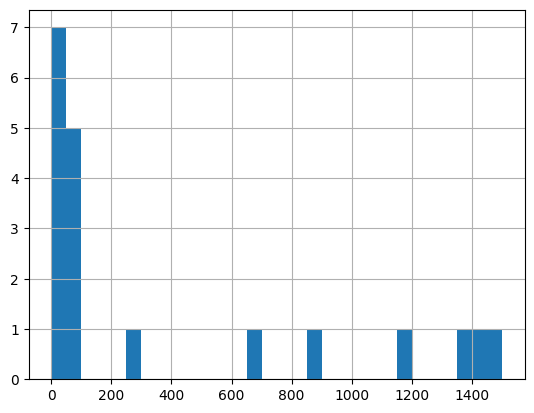

In [54]:
x = range(0,1550,50)
null_values = {}
null_keys = set()
null_diff = set()
for c in df.columns:
    counter = 0
    for r in df[c]:
        if r == 0 or r == 0.0:
            continue
        if pd.isnull(r) or r in a:
            null_keys.add((c,str(r)))
            counter +=1
        if pd.isna(r) != r in a:
            null_diff.add((c,str(r)))
    if counter > 0:
        null_values[c] = counter
null_pd = pd.Series(null_values)
print(null_pd)
print(null_pd.info())
null_pd.hist(bins=x)
y = null_pd

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
<class 'pandas.core.series.Series'>
Index: 19 entries, LotFrontage to MiscFeature
Series name: None
Non-Null Count  Dtype
--------------  -----
19 non-null     int64
dtypes: int64(1)
memory usage: 304.0+ bytes
None


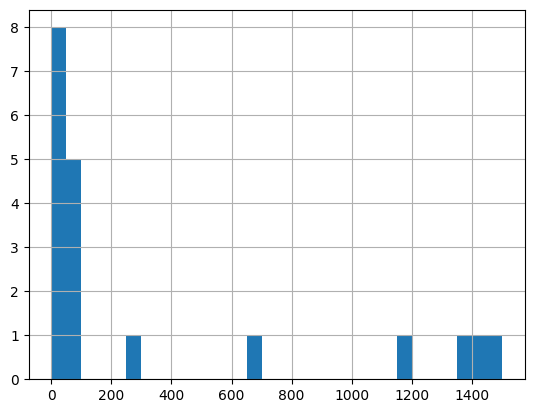

In [55]:
# your code here
x = range(0,1550,50)

y = df.isnull().sum()
y = y[[c>0 for c in y]]
print(y)
print(y.info())
# Please uncomment and update
# do not change the names of the variables from null_counts and histogram

null_counts=pd.Series(y)
histogram = null_counts.hist(bins=x) # replace the histogram to be the plt.hist() object. 

# Hint: Use .isnull() and sum over True values on columns.

In [56]:
# Test; basic histogram tests
# assert(len(y)==30), "Check null_counts, make sure features with zero null values are not included"
assert(len(x)==31), "X-axis is null value count range [0...1500], bin width 50"

3. Imputing missing values

In this part, we will decide methods to clean the data with missing values.

Complete case analysis (CCA) is to drop any observations (rows) that have null values. It is suitable if the number of observations with null values are very small (say, less than 5%) compared to the total number of observations.

If the data has a large number of features (columns) and the model(s) does not need that many features (some models work better with less number of features), we can consider dropping features that have many missing values. Before dropping features, it is generally a good idea checking whether the feature with missing values is important feature or not (which may need the analyst's judgement). If the feature is very important for the prediction task (for example, a house size when predicting house price) but has a large amount of missing values, we cannot simply drop the feature, or in a rare case, it could mean that the data is not suitable for the analysis. One will have to work with only the observations that has values on that feature given the number of observations is sufficient, or collect more data. If we know that those features are not very important and have a large number of missing values, we can drop the features. As a rule of thumb, features with missing values more than either 5% or 10% can be dropped.

### 3a) Is the data suitable for complete case analysis or not?

In [57]:
# your code here
y2 = y/len(df) * 100
print(y2)
# uncomment and update to string 'no' or 'yes'
suitable_cca = 'yes'

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


### 3b) Dropping feature columns
**Imputation** is the process of replacing missing data with substituted values. Let's assume we want to keep columns where 5% or less of the values are null (***keep and impute***) and discard any column where more than 5% of the values are null (***throw***). Treat the string type "None" as a category and not a null value.

#### 3b-i) According to above condition (5% threshold), how many features can be kept and imputed?
#### 3b-ii) Which columns have null values 5% or less of total, so we can impute? 
#### 3b-iii) Which columns have null vaues more than 5% of total, so we should throw?

In [76]:
# your code here
y2 = y/len(df) * 100
print(y2)
to_throw = list(filter(lambda x: y2[x]>5, y2.keys()))
to_impute = list(filter(lambda x: x not in to_throw, y2.keys()))
print(to_throw)
print(to_impute)
# 3b-i Hint: In the previous question 2c we calculated null_counts of all the features. We can split that into 2
# lists i.e features_to_impute and features_to_throw. 
# features_to_impute will contain features/columns that have null values <= 5% of the total number of rows.
# features_to_throw will contain features/columns that have null values > 5%

# Complete the codes below by uncommenting and changing the values of features_to_impute and features_to_throw. 
# Each should be a list of feature names (e.g. ['LotFrontage','Alley',...]). Do not change the variable names. 
# There are hidden tests which will grade above three questions.

# features_to_impute = []
# features_to_throw = []

# print(len(features_to_impute), features_to_impute)
# print(len(features_to_throw), features_to_throw)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64
['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']
